In [45]:
from DiffeoOT_S1 import *
from utils import *
import torch
import torch.nn.functional as tnn
import time 
import numpy as np
import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

In [46]:
m=128
x =2*np.pi*torch.arange(0,m)/m
print(x.shape)
grid = torch.stack([torch.cos(x),torch.sin(x)], dim=1).T
print(grid.shape)

torch.Size([512])
torch.Size([2, 512])


In [47]:
mu1= torch.ones(m)
mu1/=m
mu2= torch.ones(m)
mu2[0]=32
mu2[]=32
mu2[256]=32
mu2[384]=32
mu2/=mu2.sum()

In [48]:
params=[]
params+=[{'T':12, 'match_coeff':100000000000, 'path_coeff':1}]

In [49]:
def inner_prod(X,source,p,grid):
    pX= p*X
    return (((pX)**2).sum(dim=0)/p).sum()  

In [50]:
start =time.time()
vecs = DiffeoOT_multires(mu1,mu2,grid,params,inner_prod)
pl_pathlength = path_length(mu1,vecs,grid,inner_prod)
print(pl_pathlength)
N=vecs.shape[0]
print(pl_pathlength.sum()/pl_pathlength.shape[0])

[ 86.48586273  83.08687592  69.94072423 106.91024386 118.45811962
 117.44126625 145.48559966 195.41909182  93.64417609 120.40620268
  26.4241448 ]
105.79111887816612


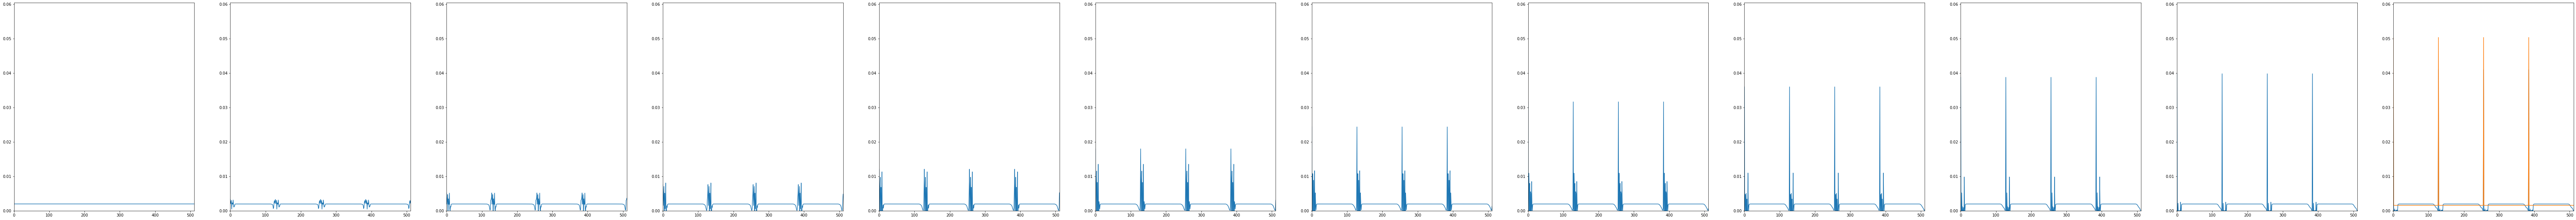

In [51]:
ls = make_and_plot_sequenceS1(mu1,mu2,vecs, grid)

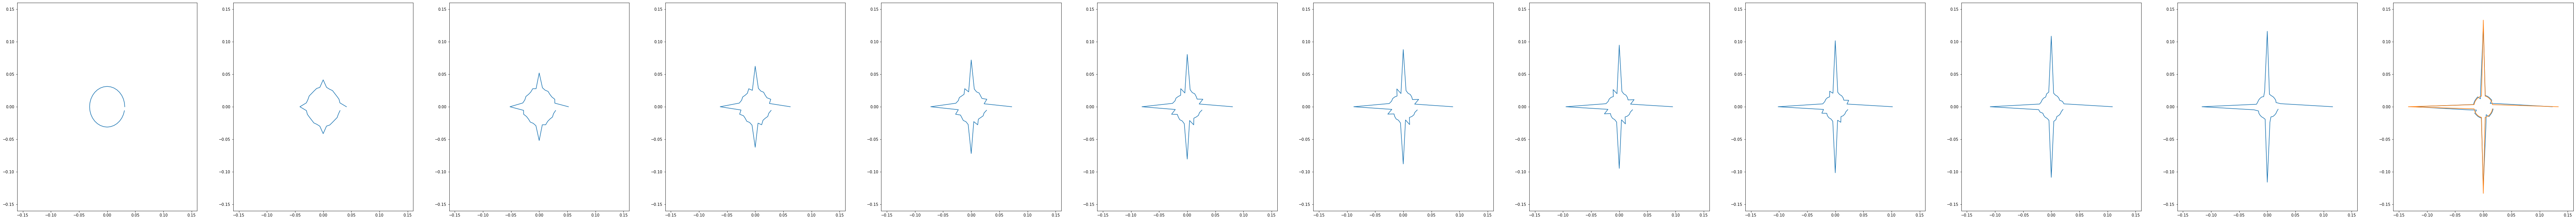

In [41]:
ls = make_and_plot_sequenceS1_c(mu1,mu2,vecs, grid)

In [42]:
p=mu1
T=vecs.shape[0]
wsupp= torch.stack([(p*grid[0]),(p*grid[1])],dim=1)
print((wsupp.sum(dim=0)**2).sum())
for i in range(1,T):    
    X=vecs[i]
    p=resample_densityS1(p,grid,X,T-1)
    wsupp= torch.stack([(p*grid[0]),(p*grid[1])],dim=1)
    print((wsupp.sum(dim=0)**2).sum())

tensor(8.7517e-16)
tensor(8.1759e-16, dtype=torch.float64)
tensor(7.1937e-16, dtype=torch.float64)
tensor(6.3420e-16, dtype=torch.float64)
tensor(5.6585e-16, dtype=torch.float64)
tensor(5.1499e-16, dtype=torch.float64)
tensor(4.7966e-16, dtype=torch.float64)
tensor(4.5622e-16, dtype=torch.float64)
tensor(4.4487e-16, dtype=torch.float64)
tensor(4.4670e-16, dtype=torch.float64)
tensor(4.5288e-16, dtype=torch.float64)
tensor(4.6285e-16, dtype=torch.float64)


In [31]:
import ot
supports = grid.reshape(m*m,1,2)
costmatrix = ((supports-supports.transpose(0,1))**2).sum(dim=2).cpu().numpy()
m1=mu_1[0,0].reshape(m*m).cpu().numpy()
m2=mu_2[0,0].reshape(m*m).cpu().numpy()

Wd =  ot.sinkhorn2(m1, m2, costmatrix, .00075)
print(np.sqrt(Wd))

RuntimeError: shape '[1024, 1, 2]' is invalid for input of size 64